In [2]:
import sympy as sp
import numpy as np
import math
from sympy.plotting import plot
import matplotlib.pyplot as plt
from ipywidgets import interact

sp.init_printing(use_latex=True)

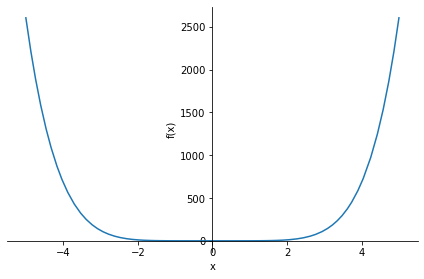

In [16]:
x=sp.symbols('x')
#a1 , b1 = -0.000002 , -0.0000001
#c , d = 0.0000008 , 0
a=0.00005
b=0
#region_a=a1*x**2+b1*x**4+c*x**6-d*x

y=x*((x-a)**2)*((x+a)**2)-b
y_1=sp.integrate(y,x)

p1=plot(y_1,(x,-5,5))

In [32]:
y

NameError: name 'y' is not defined

In [2]:
x = np.linspace(0, 2*np.pi, num=5000)
y = []
param = 50

for i in range(1,param+1):
    y.append([np.sin(i*j) for j in x])

def f(k):
    plt.plot(x, y[k])
    plt.show()

interact(f, k=(0,param-1) )

interactive(children=(IntSlider(value=24, description='k', max=49), Output()), _dom_classes=('widget-interact'…

<function __main__.f(k)>

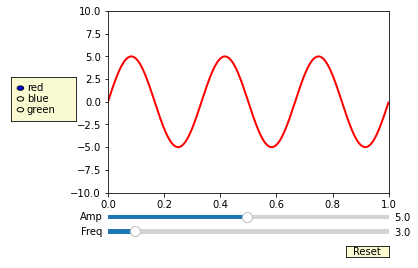

In [3]:
from numpy import pi, sin
from matplotlib.widgets import Slider, Button, RadioButtons

def signal(amp, freq):
    return amp * sin(2 * pi * freq * t)

axis_color = 'lightgoldenrodyellow'

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)

t = np.arange(0.0, 1.0, 0.001)
amp_0 = 5
freq_0 = 3

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 1])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters

# Define an axes area and draw a slider in it
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)

# Draw another slider
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()